In [15]:
!pip install imbalanced-learn

   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/258.0 kB 660.6 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/258.0 kB 660.6 kB/s eta 0:00:01
   ---------- ---------------------------- 71.7/258.0 kB 563.7 kB/s eta 0:00:01
   ---------------- --------------------- 112.6/258.0 kB 819.2 kB/s eta 0:00:01
   ------------------------- ------------ 174.1/258.0 kB 958.1 kB/s eta 0:00:01
   ---------------------------------------- 258.0/258.0 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/301.8 kB ? eta -:--:--
   --------- ------------------------------ 71.7/301.8 kB 3.8 MB/s eta 0:00:01
   --------- ------------------------------ 71.7/301.8 kB 3.8 MB/s eta 0:00:01
   ---------------------------------------- 301.8/301.8 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled j

In [16]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from keras import Sequential
from imblearn.over_sampling import SMOTE 
from keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from collections import Counter

In [17]:
df = pd.read_csv("bankloan.csv")
df= df.dropna()
df.isna().any()
df = df.drop('Loan_ID', axis=1)
df['LoanAmount']=(df['LoanAmount']*1000).astype(int)
Counter(df['Loan_Status'])['Y']/df['Loan_Status'].size

0.6916666666666667

In [18]:
pred_y = df["Loan_Status"]
pred_x = df.drop('Loan_Status', axis =1)
dm_x = pd.get_dummies(pred_x)
dm_y = pred_y.map(dict(Y=1, N=0))


In [47]:
dm_x

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,4583,1508.0,128000,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0
2,0.0,3000,0.0,66000,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
3,0.0,2583,2358.0,120000,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1
4,0.0,6000,0.0,141000,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1
5,2.0,5417,4196.0,267000,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,2900,0.0,71000,360.0,1.0,1,0,1,0,1,0,1,0,1,0,0
610,3.0,4106,0.0,40000,180.0,1.0,0,1,0,1,1,0,1,0,1,0,0
611,1.0,8072,240.0,253000,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
612,2.0,7583,0.0,187000,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1


In [24]:
smote = SMOTE(random_state = 2)
X1,Y = smote.fit_resample(dm_x,dm_y)
sc = MinMaxScaler()
X = sc.fit_transform(X1)

In [54]:
with open(r"scale.pkl", "wb") as output_file:
    pickle.dump(sc, output_file)

array([[ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [

In [25]:
X_train,X_test,y_train,y_test =train_test_split(X,Y,test_size=0.2,random_state=42,shuffle=True)

In [32]:
model = Sequential()
model.add(Dense(200,activation="relu",kernel_initializer="random_normal",input_dim=X_train.shape[1]))
model.add(Dense(400,activation="relu",kernel_initializer="random_normal"))
model.add(Dense(4,activation="relu",kernel_initializer="random_normal"))
model.add(Dense(1,activation="sigmoid",kernel_initializer="random_normal"))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train, batch_size=20,epochs=50,verbose=1)
eval_model=model.evaluate(X_train,y_train)
eval_model

Epoch 1/50
27/27 [==============================] - 3s 6ms/step - loss: 0.6907 - accuracy: 0.4934
Epoch 2/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6571 - accuracy: 0.7137
Epoch 3/50
27/27 [==============================] - 0s 4ms/step - loss: 0.5770 - accuracy: 0.7533
Epoch 4/50
27/27 [==============================] - 0s 4ms/step - loss: 0.4953 - accuracy: 0.7684
Epoch 5/50
27/27 [==============================] - 0s 4ms/step - loss: 0.4244 - accuracy: 0.8249
Epoch 6/50
27/27 [==============================] - 0s 4ms/step - loss: 0.3934 - accuracy: 0.8305
Epoch 7/50
27/27 [==============================] - 0s 4ms/step - loss: 0.3767 - accuracy: 0.8437
Epoch 8/50
27/27 [==============================] - 0s 4ms/step - loss: 0.3704 - accuracy: 0.8493
Epoch 9/50
27/27 [==============================] - 0s 4ms/step - loss: 0.3595 - accuracy: 0.8531
Epoch 10/50
27/27 [==============================] - 0s 4ms/step - loss: 0.3581 - accuracy: 0.8625
Epoch 11/50
27/27 [

[0.24654754996299744, 0.9020715355873108]

In [42]:
y_pred = model.predict(X_test)
y_pred =(y_pred>0.5)

5/5 [==============================] - 0s 1ms/step


In [55]:
model.save("loan_model.h5")

<AxesSubplot:>

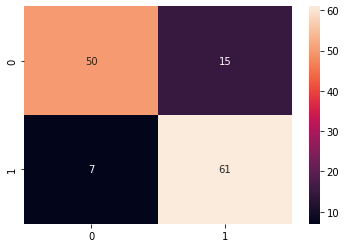

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)


In [51]:
import pickle
with open(r"Myapi/ohe.pkl", "rb") as input_file:
    e = pickle.load(input_file)
# pickle.load("Myapi/ohe.pkl")